### 분석

- fbprobhet를 통한 시계열 예측

- AutoRegressive 알고리즘을 통한 예측

### Data Load


In [2]:
import numpy as np
import pandas as pd
data = pd.read_excel('/content/Superstore.xls')

In [3]:
!pip install --upgrade xlrd


In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#필요한 컬럼 필터링
data = data[['Order Date', 'Ship Date','Sales', 'Profit']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
 2   Sales       9994 non-null   float64       
 3   Profit      9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 312.4 KB


In [7]:
data['gap'] = data['Ship Date'] - data['Order Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data

,Order Date,Ship Date,Sales,Profit,gap
0,2016-11-08,2016-11-11,261.9600,41.9136,3 days
1,2016-11-08,2016-11-11,731.9400,219.5820,3 days
2,2016-06-12,2016-06-16,14.6200,6.8714,4 days
3,2015-10-11,2015-10-18,957.5775,-383.0310,7 days
4,2015-10-11,2015-10-18,22.3680,2.5164,7 days
...,...,...,...,...,...
9989,2014-01-21,2014-01-23,25.2480,4.1028,2 days
9990,2017-02-26,2017-03-03,91.9600,15.6332,5 days
9991,2017-02-26,2017-03-03,258.5760,19.3932,5 days
9992,2017-02-26,2017-03-03,29.6000,13.3200,5 days


### Linear Regression에 Time 데이터 적용


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = data[['Profit','gap']]
y = data['Sales']

In [11]:
X.info

<bound method DataFrame.info of         Profit    gap
0      41.9136 3 days
1     219.5820 3 days
2       6.8714 4 days
3    -383.0310 7 days
4       2.5164 7 days
...        ...    ...
9989    4.1028 2 days
9990   15.6332 5 days
9991   19.3932 5 days
9992   13.3200 5 days
9993   72.9480 5 days

[9994 rows x 2 columns]>

In [12]:
X

,Profit,gap
0,41.9136,3 days
1,219.5820,3 days
2,6.8714,4 days
3,-383.0310,7 days
4,2.5164,7 days
...,...,...
9989,4.1028,2 days
9990,15.6332,5 days
9991,19.3932,5 days
9992,13.3200,5 days


In [13]:
X['gap'] = X['gap'].apply(lambda x:x.days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
model = LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression()

### Unix Timestamp형태로 바꾸기|

In [16]:
data = pd.read_excel('/content/Superstore.xls')

In [17]:
data = data[['Order Date','Ship Date', 'Sales', 'Profit']]

In [18]:
#Scientific형태로 보이는 것을 일반 숫자 형태로 보이도록 조절
pd.set_option('display.float_format', lambda x:'%.0f' % x)

In [19]:
#Datatime을 unix tamesamp로 변환
data['Order Date'] = pd.to_numeric(data['Order Date'])/10**9
data['Ship Date'] = pd.to_numeric(data['Ship Date']) /10**9

In [20]:
#Ship data와 order date의 차이 컬럼 추가
data['gap'] = data['Ship Date'] - data['Order Date']

In [21]:
data.head()

,Order Date,Ship Date,Sales,Profit,gap
0,1478563200,1478822400,262,42,259200
1,1478563200,1478822400,732,220,259200
2,1465689600,1466035200,15,7,345600
3,1444521600,1445126400,958,-383,604800
4,1444521600,1445126400,22,3,604800


In [22]:
X = data[['Profit','gap']]
y =data['Sales']

In [23]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

### 실습


#### 모듈 및 데이터 로딩

In [24]:
!pip install pystan

In [25]:
!pip install fbprophet

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data = pd.read_excel('/content/Superstore.xls',index_col=0)

#### 데이터 확인

In [28]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2,0,42
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,3,0,220
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2,0,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0,-383
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0,3


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [30]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994
mean,55190,230,4,0,29
std,32064,623,2,0,234
min,1040,0,1,0,-6600
25%,23223,17,2,0,2
50%,56430,54,3,0,9
75%,90008,210,5,0,29
max,99301,22638,14,1,8400


### Data Cleaning

In [31]:
#Furniture데이터만 필터링
data =data[data['Category'] == 'Furniture']

In [32]:
#필요한 컬럼만 필터링
data = data[['Order Date','Sales']]

In [33]:
#날짜별로 Groupby하여 Sales총합 계산
data = data.groupby('Order Date').sum()

In [34]:
#월별 평균 Sales로 계산
data = data.resample('MS').mean()

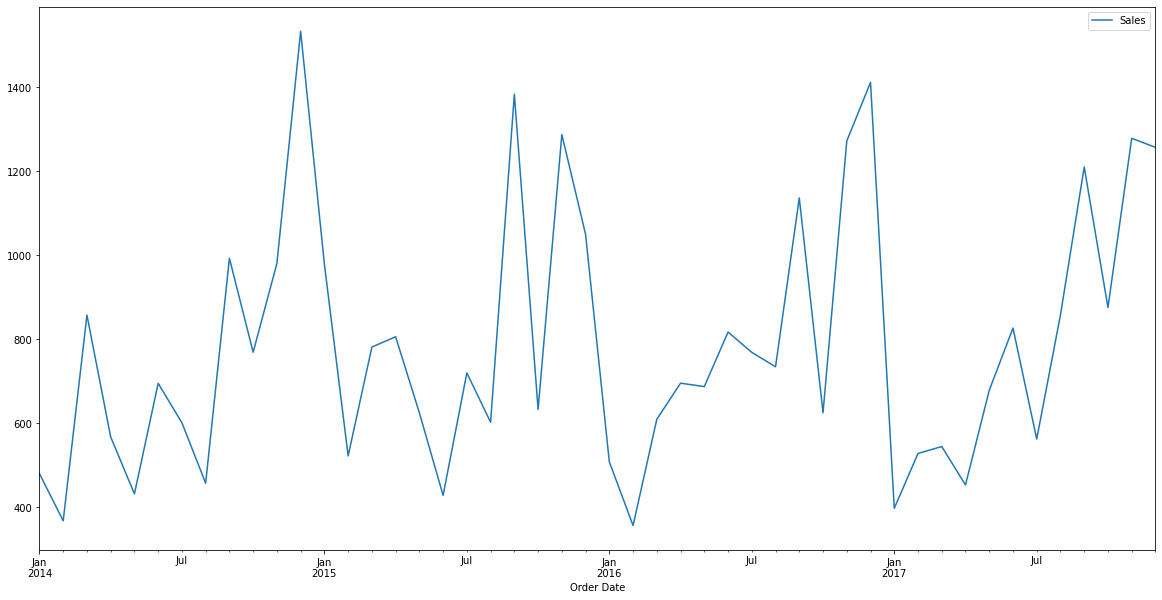

In [35]:
#Line plot로 그려보기
data.plot(figsize=(20,10))

### Prophet 알고리즘으로 모델링

In [36]:
from fbprophet import Prophet

In [37]:
#인덱스에 들어있는 날짜 부분을 꺼내기 위해서 reset_index
df = data.reset_index()

In [38]:
#Prophet알고리즘은 ds와y 컬럼 이름을 변경
df.columns=['ds','y']

In [39]:
#Prophet모델 트레이닝
model =Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
#기간을 30달로 설정하여 예측 구간 설정
future = model.make_future_dataframe(periods=30, freq='M')
future.tail()

,ds
73,2020-01-31
74,2020-02-29
75,2020-03-31
76,2020-04-30
77,2020-05-31


In [41]:
#예측데이터 생성
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
73,2020-01-31,177,13,341
74,2020-02-29,947,785,1102
75,2020-03-31,823,672,981
76,2020-04-30,623,463,774
77,2020-05-31,533,371,691


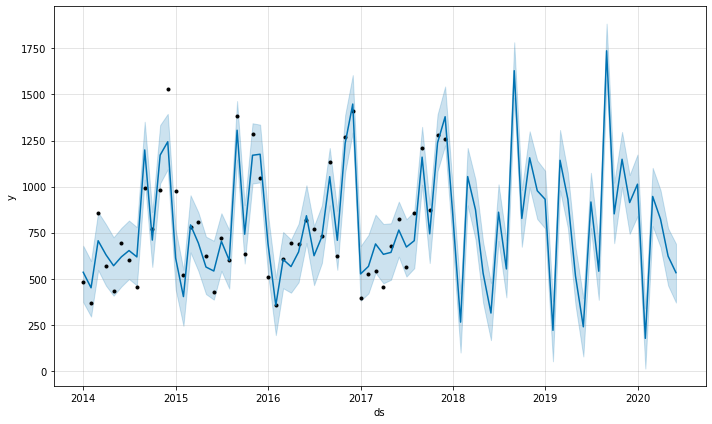

In [42]:
fig1 = model.plot(forecast)

### 2017년 데이터 예측하여 비교

In [43]:
#트레이닝 데이터는 2016년까지 데이터로 필터링
new_df = data[:'2016']

In [44]:
#인덱스 리셋하고 컬럼명 변경
new_df.reset_index(inplace=True)
new_df.columns = ['ds','y']

In [45]:
#트레이닝 및 예측 데이터 생성(2017년 데이터 예측이므로 기간은 12개월)
model =Prophet()
model.fit(new_df)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
43,2017-07-31,593,442,755
44,2017-08-31,1553,1409,1709
45,2017-09-30,885,734,1031
46,2017-10-31,1289,1129,1424
47,2017-11-30,1189,1047,1337


In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,682,479,783,682,682,-47,-47,-47,-47,-47,-47,0,0,0,634
1,2014-02-01,686,265,556,686,686,-274,-274,-274,-274,-274,-274,0,0,0,412
2,2014-03-01,689,586,885,689,689,42,42,42,42,42,42,0,0,0,732
3,2014-04-01,693,511,805,693,693,-35,-35,-35,-35,-35,-35,0,0,0,659
4,2014-05-01,697,383,684,697,697,-165,-165,-165,-165,-165,-165,0,0,0,532
5,2014-06-01,701,406,716,701,701,-133,-133,-133,-133,-133,-133,0,0,0,568
6,2014-07-01,705,496,802,705,705,-58,-58,-58,-58,-58,-58,0,0,0,647
7,2014-08-01,709,387,676,709,709,-172,-172,-172,-172,-172,-172,0,0,0,538
8,2014-09-01,713,994,1287,713,713,437,437,437,437,437,437,0,0,0,1150
9,2014-10-01,717,486,786,717,717,-76,-76,-76,-76,-76,-76,0,0,0,641


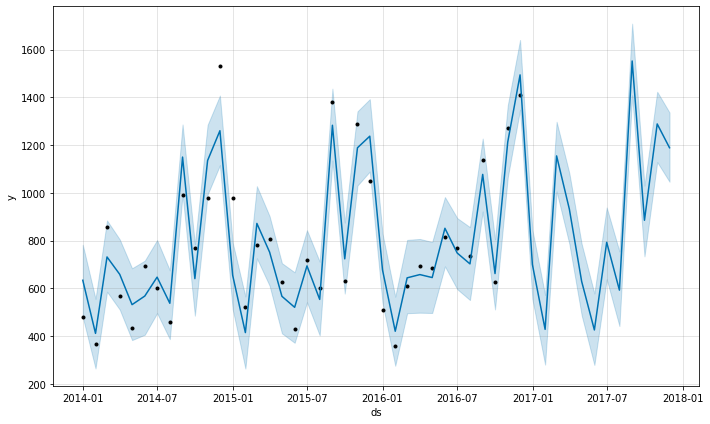

In [47]:
#예측 데이터로 Line plot그려보기
fig1 = model.plot(forecast)

In [48]:
#비교 plot를 그리기 위해서 예측 데이터의 날짜 부분을 인덱스로 설정
forc = forecast[['ds','yhat']].set_index('ds')

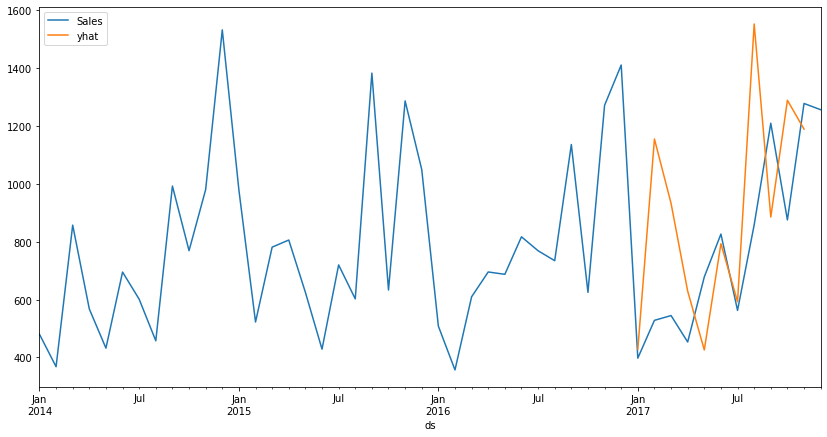

In [49]:
#원본 데이터와 예측 데이터를 하나의 plot로 그려서 비교
ax = data.plot()
forc.loc['2017-01-01':].plot(ax=ax, figsize=(14,7))

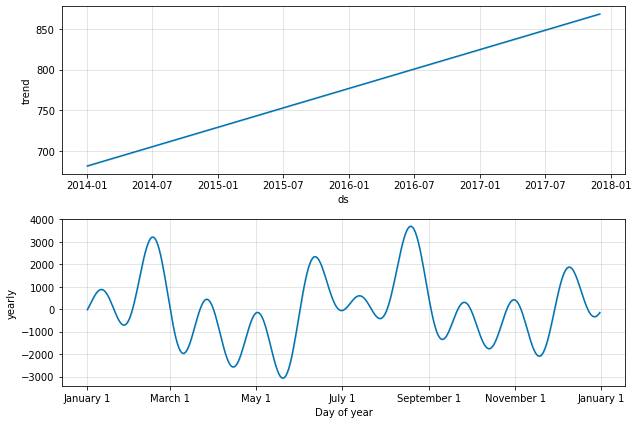

In [50]:
#예측 모델의 구성요소 plot확인
model.plot_components(forecast)
plt.show()

### Auto Regression 모델로 2017년 데이터 예측

In [51]:
#트레이닝 데이터는 2016년까지 데이터로 필터링
new_df = data[:'2016']

In [52]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
!pip install statsmodels --upgrade


In [54]:
model = AutoReg(new_df, lags=12)
model_fit = model.fit()

In [55]:
#예측 데이터 생성
predictions = model_fit.predict(start=len(new_df), end=len(new_df)+11)

In [56]:
predictions

2017-01-01    661
2017-02-01    311
2017-03-01    433
2017-04-01    590
2017-05-01    635
2017-06-01    933
2017-07-01    960
2017-08-01    984
2017-09-01    989
2017-10-01    555
2017-11-01   1031
2017-12-01   1194
Freq: MS, dtype: float64

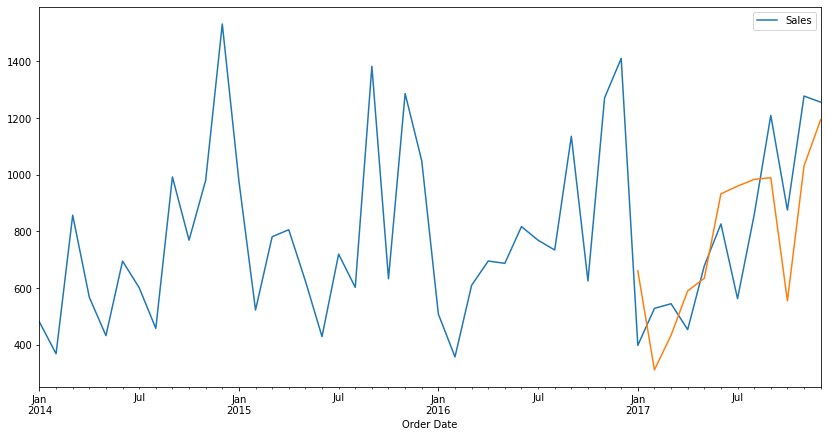

In [57]:
#원본 데이터와 예측 데이터를 한의 plot으로 그래서 비교
ax =data.plot()
ax.legend()
predictions.plot(ax=ax, figsize=(14,7))